# Проект: Принятие решений в бизнесе

# Описание проекта

Вместе с отделом маркетинга были подготовленны гипотезы для увеличения выручки. Следует провести приоритезацию гипотез и запустиь А/В тестирвоание. Сделать выводы и предположения по каждому шагу. В заключении, принять решение по результатам теста.
Проект будет состоять из **двух** частей:

**Часть_1. Приоритизация гипотез.**

Приоритезировать гипотезы.

*Задача:*
- Выяснить, как изменилась приоритизация гипотез при применении фреймворка RICE вместо ICE.

*Данные для анализа:*
- /datasets/hypothesis.csv (данные с гипотезами)

**Часть_2. Анализ A/B-теста**

Запуск А/В теста и анализ результата

*Задача:*
- Построить график кумулятивной выручки по группам;
- Построить график кумулятивного среднего чека по группам; 
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A;
- Построить график кумулятивного среднего количества заказов на посетителя по группам;
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
- Построить точечный график количества заказов по пользователям;
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей;
- Построить точечный график стоимостей заказов;
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов;
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
- Принять решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.
    
*Данные для анализа:*
- /datasets/orders.csv (данные о заказах)
- /datasets/visitors.csv (данные о пользователях)

## Часть_1. Приоритизация гипотез.

### Ознакомление и предобработка данных

#### Необходимые для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
from scipy import stats as st
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

#### Структура датафрейма

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### `hypothesis` - датасет с гипотезами

In [2]:
try:
    hypothesis = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/9_Принятие_решений_в_бизнесе')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Типы данных соответствуют значениям в таблице**

In [4]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


**По описанию, данные в порядке**

In [5]:
hypothesis.duplicated().sum()

0

**Дубликаты не обнаруженны**

#### Предобработка данных

**Приведу названия колонок к нижнему регистру**

In [6]:
hypothesis.columns = map(str.lower, hypothesis.columns)
hypothesis.head(0)

,hypothesis,reach,impact,confidence,efforts


**Для удобства, сниму ограничение на количество символов в записях**

In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


#### Вывод

- Загруженны нужные для анализа данных библиотеки;
- Создана переменная `hypothesis` - данные о гипотезах;
- Добавлено описание структуры датафрейма `hypothesis`;
- В таблице 9 гипотез;
- Типы данных соответствуют значениям в таблице;
- Данные корректные, выбросов не обнаруженно;
- Дубликаты отсутствуют;
- Проведена предобработка данных:
    - Названия колонок приведены к общему формату
    - Снято ограничение на кол-во символов, чтобы можно было увидеть всю гипотезу датафрема.

### Фреймворк ICE

In [9]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False).round(1)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


### Фреймворк RICE

In [10]:
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'])\
/ hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False).round(1)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


### Вывод
Наиболее перспективные гипотезы по фреймворку `ICE` с индексами: 8, 0, 7.
Наиболее перспективные гипотезы по фреймворку `RICE` с индексами: 7, 2, 0, 6.

Гипотезы с индексом 0 и 7 попали в оба результата расчетов по фреймворкам `ICE` и `RICE`. Однако, позиционирование этих гипотез сместилось во фрейморке `RICE`. Это произошло из-за того, что параметр "reach"(параметр, показывающий скольких пользователей затронет гипотеза по шкале от 0 до 10) больше, чем у остальных гипотез.

## Часть_2. Анализ A/B-теста

### Ознакомление и предобработка данных

#### Структура датафрейма
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ

#### `orders` - датасет с информацией о заказах

In [11]:
try:
    orders = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/9_Принятие_решений_в_бизнесе')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Привести название колонок к общему формату

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Следует изменить формат данных в колонке с датой

In [13]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


В колонке с выручкой можно увидеть аномально-большие заказы.
Данные выбросы будут искажать результаты исследования. Надо это учесть 

In [14]:
orders.duplicated().sum()

0

Дубликаты не обнаружены

#### Предобработка данных

Приведу названия колонок к общему формату

In [15]:
orders.columns = ['transaction_Id', 'visitor_Id', 'date', 'revenue', 'group']
orders.head(1)

,transaction_Id,visitor_Id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


Изменю тип данных в колонке с датой

In [16]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
) 

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_Id  1197 non-null   int64         
 1   visitor_Id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


#### Вывод
- Создана переменная orders - данные о заказах;
- Добавлено описание структуры датафрейма orders;
- Дубликаты отсутствуют;
- Проведена предобработка данных:
    - Названия колонок приведены к общему формату;
    - Изменен тип данных в колонке с датой, остальные колонки с соответствующими значениям типами данных.

###  Ознакомление и предобработка данных

#### Структура датафрейма
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

#### `visitors` - датасет с информацией о посетителях

In [18]:
try:
    visitors = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/9_Принятие_решений_в_бизнесе')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Изменить тип данных в колонке с датой

In [20]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [21]:
visitors.duplicated().sum()

0

Дубликаты не обнаружены

#### Предобработка данных

Изменю тип данных в колонке с датой

In [22]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
) 

In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Вывод
- Создана переменная visitors - данные о посетителях;
- Добавлено описание структуры датафрейма visitors;
- Дубликаты отсутствуют;
- Проведена предобработка данных:
    - Изменен тип данных в колонке с датой, остальные колонки с соответствующими значениям типами данных.

### Дубликаты пользователей в группах

Посчитаю сколько пользователей оказалось сразу в двух группах исследования

In [24]:
orders.groupby('visitor_Id').agg({'group': 'nunique'}).query('group>1').count()

group    58
dtype: int64

Всего 58 пользователей, который попали в обе группы. 
Создам новую переменную для этих пользователей. 

In [25]:
dupl_users = orders.groupby('visitor_Id').agg({'group' : 'nunique'})\
.reset_index().query('group>1')['visitor_Id'].unique()

Создам переменную, в которых исключу из основного датафрейма `orders` дублирующихся по группам пользователей

In [26]:
orders_uniq_users = orders.query('visitor_Id not in @dupl_users')
orders_uniq_users.groupby('visitor_Id').agg({'group' : 'nunique'}).query('group>1').count()

group    0
dtype: int64

Имеем датафрейм `orders`, в котором 58 пользовтелей оказались в двух группах и датафрейм `orders_uniq_users`, в котором уникальные пользователи в каждой группе. Пострю гистограмму, чтобы визуализировать данные, определить различия и принять решение оставлять этих пользовтелей или удалить их для дальнейшего проведения теста.

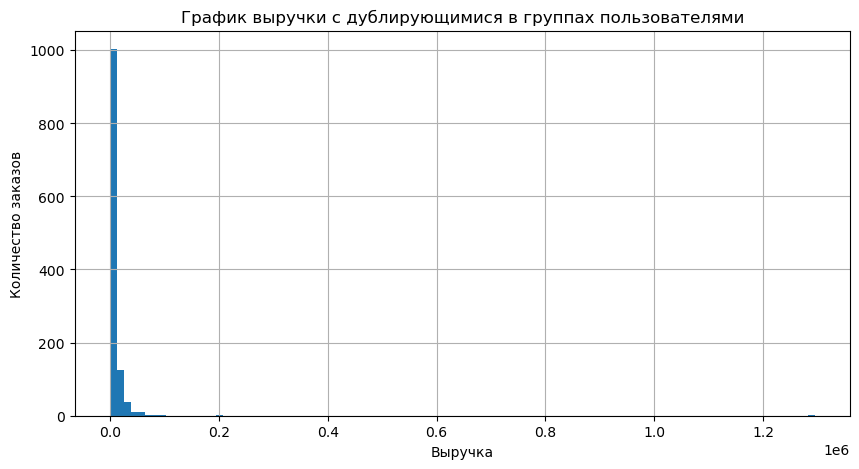

In [27]:
plt.figure(figsize=(10, 5))
orders['revenue'].hist(bins=100)

plt.title('График выручки с дублирующимися в группах пользователями')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

Чтобы были наглядны выбросы сделаю срез данных, в котором заказы будут от 20000р. Для этого создам еще одну переменную.

In [28]:
orders_for_hist = orders.loc[orders['revenue'] >= 20000]

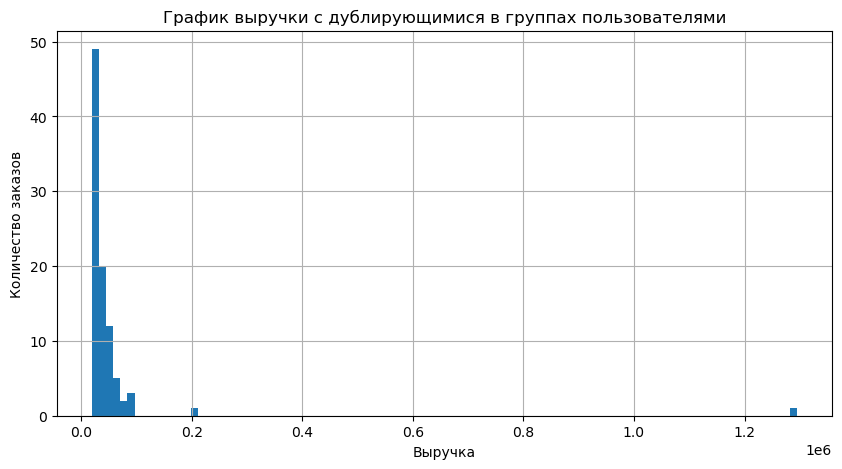

In [29]:
plt.figure(figsize=(10, 5))
orders_for_hist['revenue'].hist(bins=100)

plt.title('График выручки с дублирующимися в группах пользователями')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

Присуствуют выбросы в районе 20т.р. и 130т.р. Из-за них график график такой растянутый.

Сделю гистрограмму отфильтрованных от дублирующихся пользователей данных:

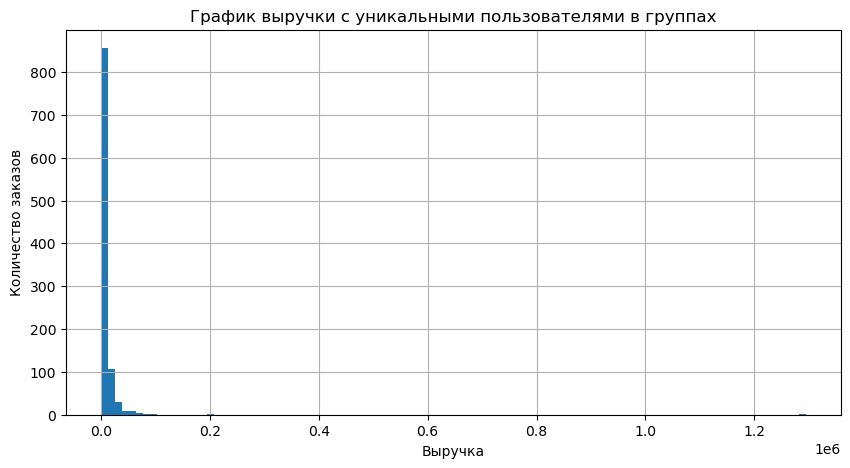

In [30]:
plt.figure(figsize=(10, 5))
orders_uniq_users['revenue'].hist(bins=100)

plt.title('График выручки с уникальными пользователями в группах')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

Чтобы были наглядны выбросы сделаю срез данных, в котором заказы будут от 20000р. Для этого создам еще одну переменную.

In [31]:
orders_uniq_users_for_hist = orders_uniq_users.loc[orders_uniq_users['revenue'] >= 20000]

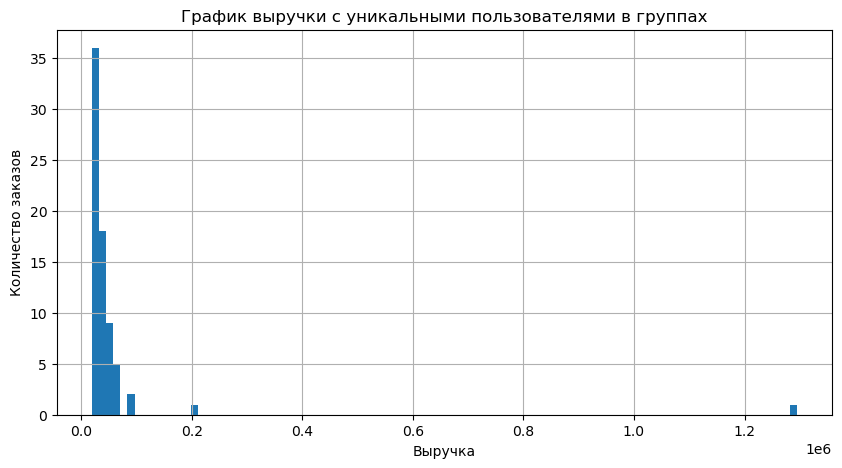

In [32]:
plt.figure(figsize=(10, 5))
orders_uniq_users_for_hist['revenue'].hist(bins=100)

plt.title('График выручки с уникальными пользователями в группах')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

#### Вывод
    
Количество заказов уменьшилось, но это никак не повлияло на общую картину. Выбросы остались, их я удалю в процессе исследования. Показатели среднего чека так же будут меняться в очищенных от дублирующихся пользователей данных, но оно не будет критично. Соотношене дублирующихся пользователей к общему кол-ву пользователей: 58 на 1197, что составляет меньше 5%. Это та погрешность, с которой можно продолжать работать. Исходя из перечисленных аргументов, я принимаю решение не удалять дублирующихся пользователей.

###  Кумулятивная выручка по группам

#### Формирование групп

In [33]:
#orders.head()

Создаю датафрейм с уникальными парами

In [34]:
datesGroups = orders[['date', 'group']].drop_duplicates()
#datesGroups.head()

Агрегированная переменная по заказам


In [35]:
ordersAggregated = datesGroups.apply(lambda x:
orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                    .agg({'date': 'max', 'group': 'max',
                                         'transaction_Id': pd.Series.nunique,
                                         'visitor_Id': pd.Series.nunique,
                                         'revenue': 'sum'}), axis=1)\
                                    .sort_values(by=['date', 'group'])

ordersAggregated.head()

,date,group,transaction_Id,visitor_Id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [36]:
#visitors.head(1)

Аналогичным образом создаю переменную по посетителям

In [37]:
visitorsAggregated = datesGroups.apply(lambda x:
visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                    .agg({'date': 'max', 'group': 'max',
                                         'visitors': 'sum'}), axis=1)\
                                    .sort_values(by=['date', 'group'])
#visitorsAggregated.head()

#### Переменная `cumulativeData` - общая агрегация по заказам и посетителям

Создаю кумулятивную переменную, объеденив аггрегированные переменные по заказам и посетителям

In [38]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'],\
                                        right_on=['date', 'group'])
cumulativeData.head()

,date,group,transaction_Id,visitor_Id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Переименую столбцы

In [39]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(0)

,date,group,orders,buyers,revenue,visitors


#### График кумулятивной выручки

Переменная с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе "А"

In [40]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
#cumulativeRevenueA.head()

Переменная с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе "B"

In [41]:
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
#cumulativeRevenueB.head()

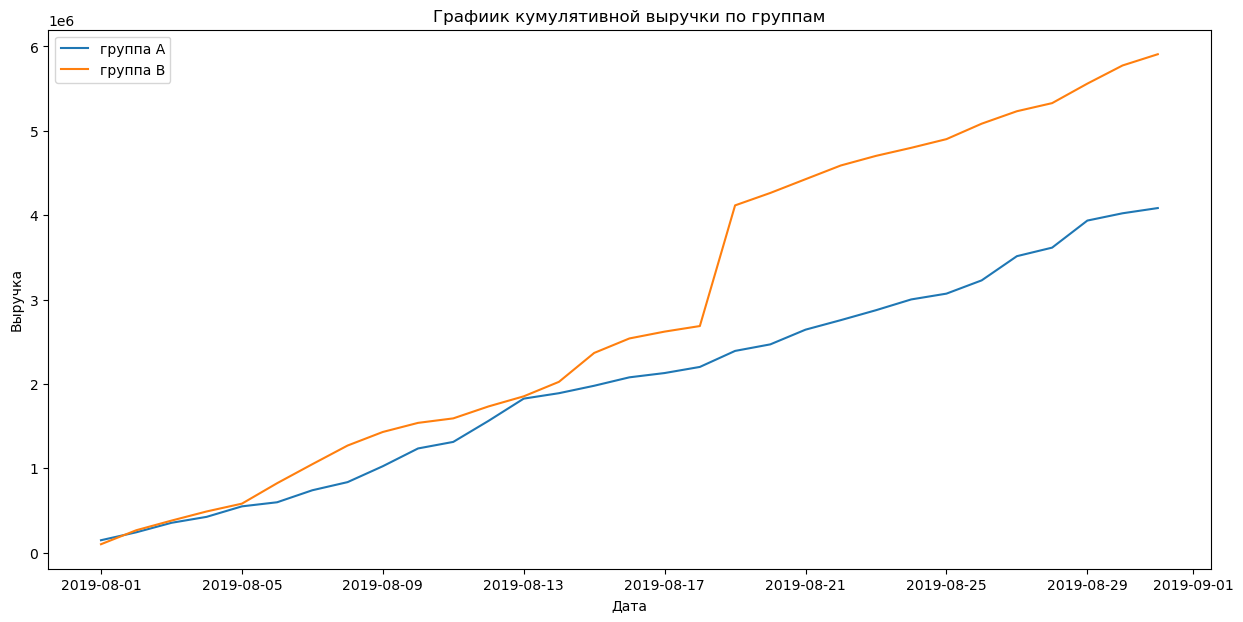

In [42]:
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.title('Графиик кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

#### Вывод
На старте теста группы имели приблизительно одинаковый показатель выручки. Но, группа "В" изначально была лидером, с небольшим перевесом. У группы "А" наблюдается равномерный рост на протяжении всего промежутка тестирования. В середине теста, группа "В" значительно выбилась в лидеры и продолжила свой рост. Аномально большие заказы влияют на результат. Их надо будет удалить.

### График кумулятивного среднего чека по группам

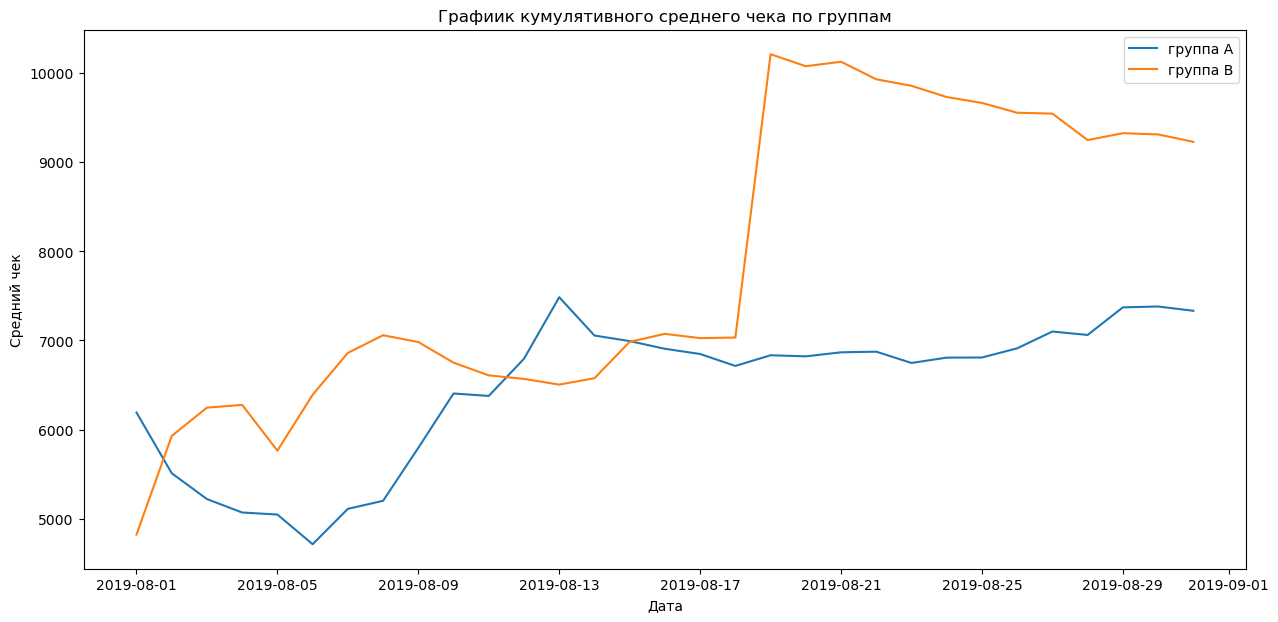

In [43]:
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа А')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('Графиик кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

#### Вывод

Значения колеблятся. В первые 5 дней среднйи чек группы "A" снижался, но после этого, видно прирост показателя и относительную стабилизацию. Если внимательно присмотреться к графику, то видно, что средний чек группы "B" имеет нестабильный показатель. Присутствует резкий рост в среднем чеке после "2019-80-17", а так же наблюдается планомерное снижение. Скорей всего это было связано с возможными выбросами, кто-то в этой период сделал очень дорогие покупки. 

###  Изменения кумулятивного среднего чека группы B к группе A


#### Переменная `mergedCumulativeRevenue`

In [44]:
mergedCumulativeRevenue = cumulativeRevenueA\
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#mergedCumulativeRevenue.head()

#### График относительного изменения кумулятивного среднего чека группы B к группе А

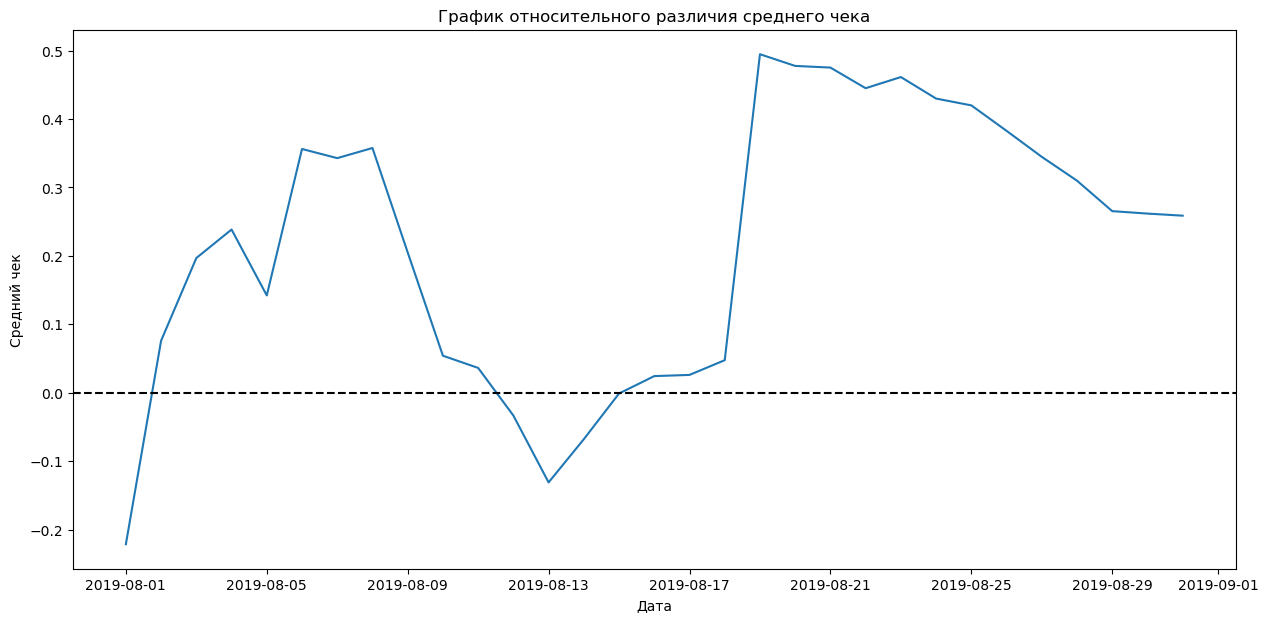

In [45]:
plt.figure(figsize=(15, 7))
plt.plot(mergedCumulativeRevenue['date'],\
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного различия среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.axhline(y=0, color='black', linestyle='--');

#### Вывод
На графике заметны значительные и резкие изменения в определенных точках. Очередной показатель аномальных выбросов.

### Кумулятивное среднего количества заказов на посетителя по группам

In [46]:
#cumulativeData.head(1)

Кумулятивное среднего количества заказов

In [47]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
#cumulativeData.head()

Кумулятивное среднего количества заказов группы А

In [48]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
#cumulativeDataА.head()

Кумулятивное среднего количества заказов группы B

In [49]:
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
#cumulativeDataB.head()

#### График кумулятивного среднего количества заказов по группам

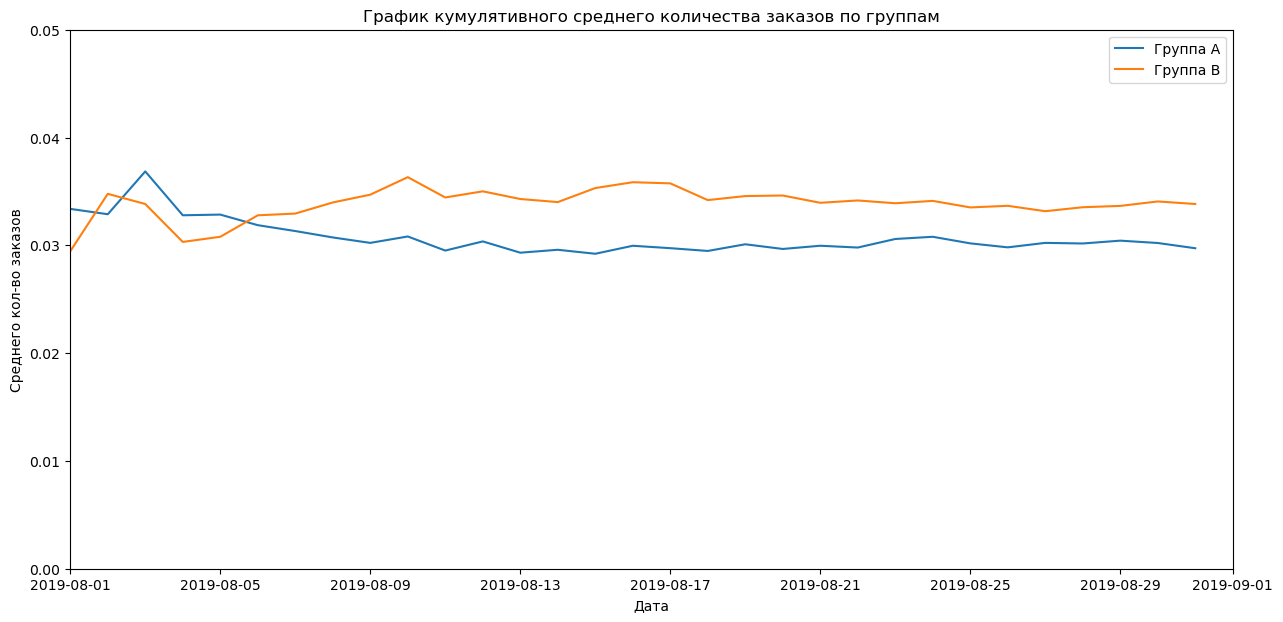

In [50]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднего кол-во заказов')
plt.legend()
# масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

#### Вывод
    
В начале теста, количество заказов группы "В" было больше, группы "А". Постепенно группа "В" стала показывать большее количество заказов и ее показатель выровнялся.  Показатель количества заказов группы "А" также показывает стабильное выравнивание, но значения количества заказов гораздо ниже относительно группы "В". Масштаб графика был изменен для того, чтобы было видно небольшую амплитуду колебаний абсолютных значений. Иначе, если убрать масштаб, будет казаться, что колебания продолжаются и количество заказов не установилась около своего среднего значения. 

### График относительных изменений кумулятивного среднего количества заказов на посетителя по группам

Объединение переменных с средним количеством заказов по группам

In [51]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


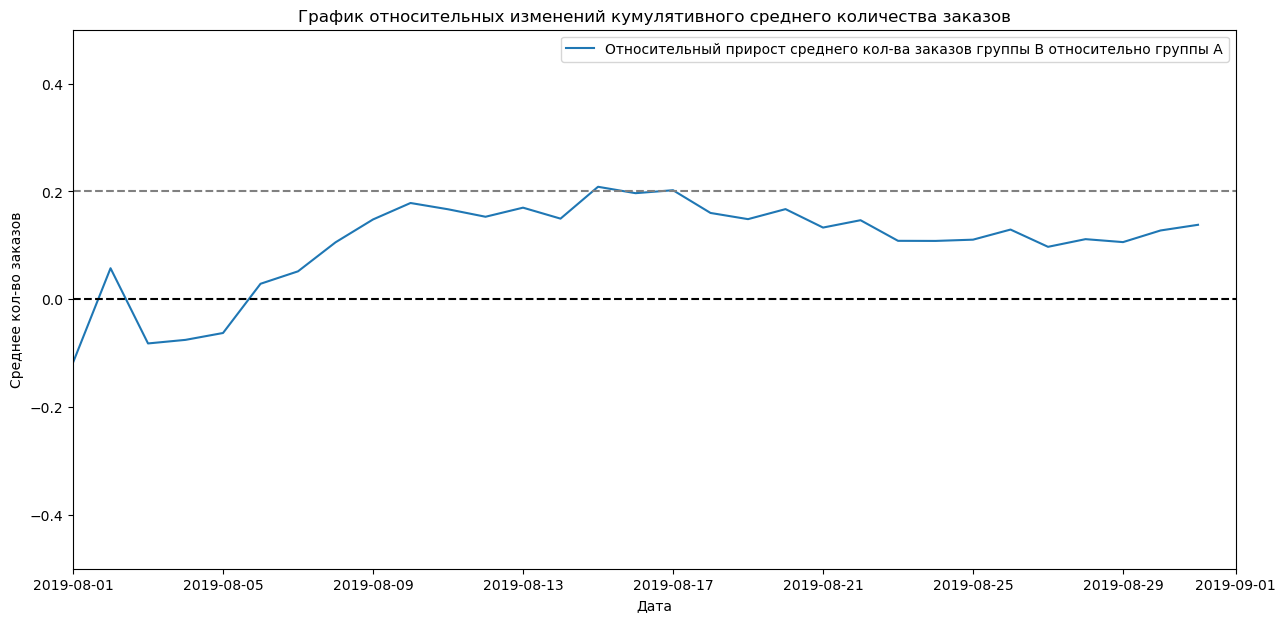

In [52]:
plt.figure(figsize=(15, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего кол-ва заказов группы B относительно группы A")
plt.legend()
plt.title('График относительных изменений кумулятивного среднего количества заказов')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1),  -0.5, 0.5]);

#### Вывод
    
Практически с самого начала группа "В" лидирует по среднему количеству заказов. В конце теста зафиксировалась около 15% прироста относительно группы "А"

### Точечный график количества заказов по пользователям

In [53]:
orders.head()

,transaction_Id,visitor_Id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [54]:
ordersByUsers = (
    orders.groupby('visitor_Id', as_index=False)
    .agg({'transaction_Id': 'nunique'})
)
ordersByUsers.columns = ['user_id','orders']

ordersByUsers.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


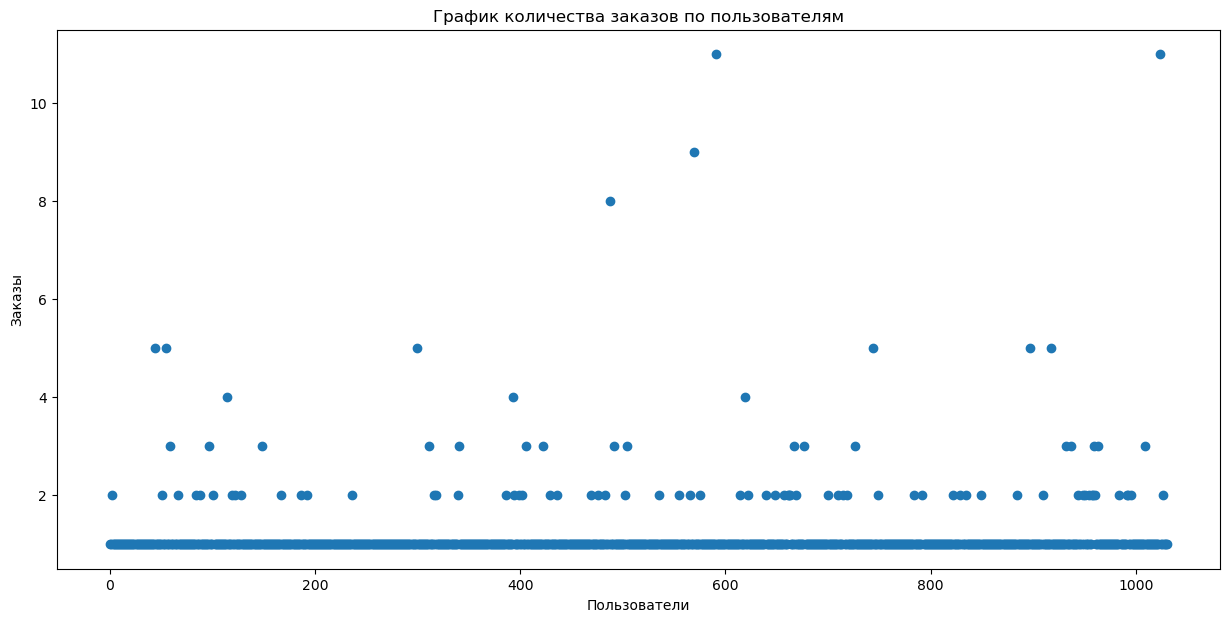

In [55]:
plt.figure(figsize=(15, 7))
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

#### Вывод
Совсем немного пользователей заказвших более 2-х раз. Для определения границы аномальных пользователей, посчитаю перцентили.

### 95-й и 99-й перцентили количества заказов на пользователя

In [56]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### Вывод
Не более 5% пользователей, совершали больше 2-х заказов и не более 1% больше четырех заказов. Пользователи с заказами больше 2-х будут считаться аномальными.

### Точечный график стоимостей заказов

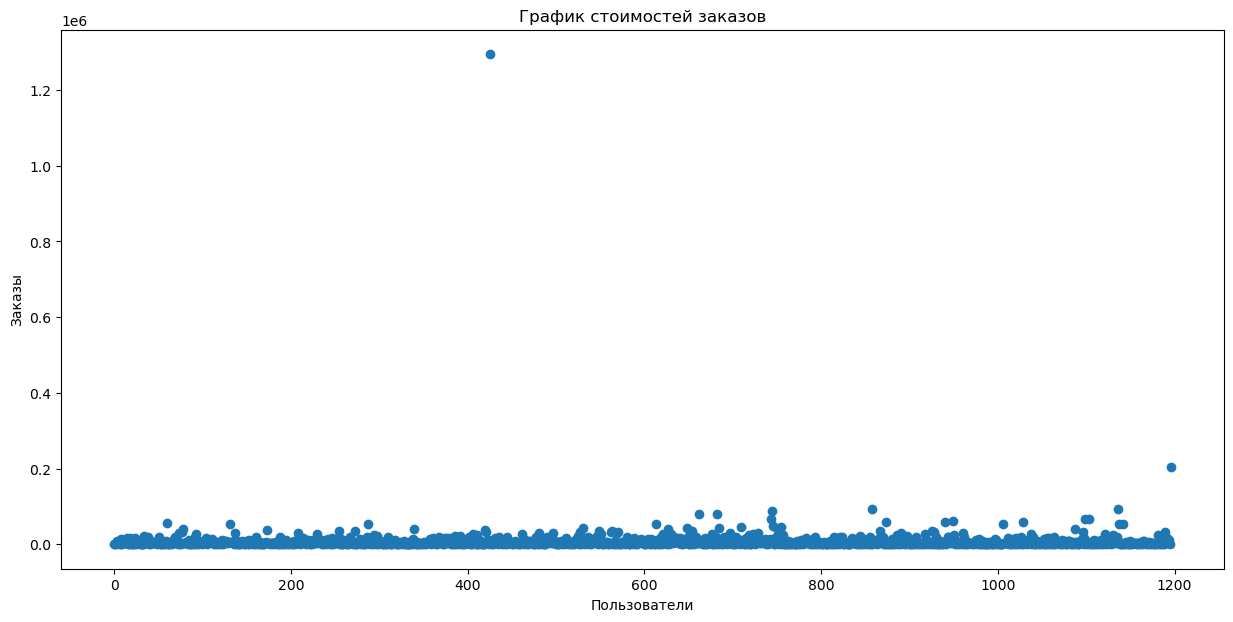

In [57]:
plt.figure(figsize=(15, 7))
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

#### Вывод
Два очевидных выброса в районе 20т. и 120т.

**Точечный график без выбросов**

Создам новую переменную без выбросов

In [58]:
orders_clear = orders.loc[orders['revenue'] <= 20000]

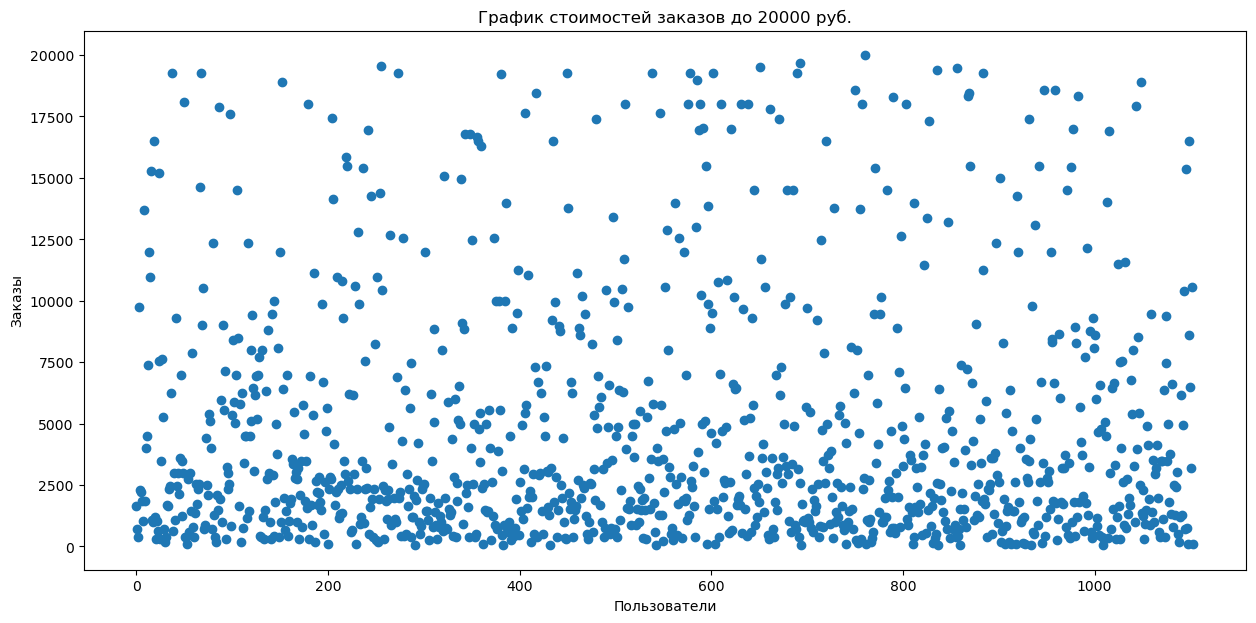

In [59]:
plt.figure(figsize=(15, 7))
plt.title('График стоимостей заказов до 20000 руб.')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders_clear['revenue'])))
plt.scatter(x_values, orders_clear['revenue']);

#### Вывод
    
Получился более наглядный график, в котром отсутствуют выбросы в заках выше 20000 руб. Можно видеть, что остновная масса заказов приходится на сумму до 3000 руб. Но так же видно, что достаточно часто пользователи совершают покупки в диапазоне до 20000 руб.Пищя для размышлейний маркетинговому отделу для реализации продукции стоимостью от 3000 руб. до 20000 руб. 

### 95-й и 99-й перцентили стоимости заказов

In [60]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


#### Вывод
Не больше 5% заказов чек выше 28000 и не больше 1% заказов выше 58233. Значение 58233 возьму для определения границы выбросов.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

#### Подготовка данных

In [61]:
orders.head(1)

,transaction_Id,visitor_Id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [62]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


Соберу общую таблицу с заказами, клиентами и кумулятивными показателями

In [63]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#visitorsADaily.head(1)

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#visitorsACummulative.head(1)

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#visitorsBDaily.head(1)

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#visitorsBCummulative.head(1)

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_Id', 'visitor_Id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_Id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#ordersADaily.head(1)

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
#ordersACummulative.head(1)

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_Id', 'visitor_Id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_Id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#ordersBDaily.head(1)

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
#ordersBCummulative.head(1)

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Объявлю переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули.

In [64]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_Id', as_index=False)
    .agg({'transaction_Id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
#ordersByUsersA.head(5)

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_Id', as_index=False)
    .agg({'transaction_Id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
#ordersByUsersB.head()

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#sampleA.head()

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#sampleB.head()

 
Нулевая гипотеза **H0** - статистически значимой зависимости в среднем кол-ве заказов нет
    
Альтернативная гипотеза **H1** - статистически значимая зависимость в среднем кол-ве заказов есть 

Уровень стат.значимости "alpha" я возьму значение в 0.05.

In [65]:
print('alpha = 0.05')
print("p-value = {0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.0168
Относительный прирост: 0.138


#### Вывод
    
P-value(0.0168) меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых данных" показывает, что в среднем кол-ве заказов между группами есть статистически значимые различия. Относительный прирость групы "B" к среднему кол-ву заказов группы "A" равен 13.8%

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

    
Нулевая гипотеза **H0** - статистически значимой зависимости среднем чеке заказа между группами нет
    
Альтернативная гипотеза **H1** - статистически значимая зависимость среднем чеке заказа между группами есть

alpha = 0.05

In [66]:
print('alpha = 0.05')
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],\
                                          orders[orders['group'] =='B']['revenue'])[1]))
print("Относительный прирост: {0:.3f}".format(orders[orders['group'] == 'B']['revenue']\
                       .mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

alpha = 0.05
p-value = 0.729
Относительный прирост: 0.259


#### Вывод
P-value(0.729) значительно больше 0.05. Статистически значимых отличий в среднем чеке между группами нет. Средний чек группы "B" относительно группы "A" больше на 25.9%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Приму за аномальных пользователей тех, кто совершил более 2-х покупок или пользователей, у который сумма заказа превышает  58233 руб.(округлю до 58000р.)
Сделаю срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 58000р руб. — `usersWithExpensiveOrders`. Объединю их в таблице `abnormalUsers`, удалю дубликаты, отсортирую по возрастанию. 

Переменная с теми, кто совершил больше 2-х заказов

In [67]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
#usersWithManyOrders.head()

Переменная с теми, кто совершил покупки свыше 58000р.

In [68]:
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitor_Id']
#usersWithExpensiveOrders.head()

Объединю таблицы

In [69]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

Считаю кол-во выбросов

In [70]:
len(abnormalUsers)

31

#### Считаю статистическую значимость по заказам с очищенными данными

Создам переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраню очищенные данные о заказах — не включая аномальных пользователей.

In [71]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#sampleAFiltered.head()

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
        0,
        index=np.arange(
            data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
        ),
        name='orders',
        ),
    ],
    axis=0,
)
#sampleBFiltered.head()

    
Нулевая гипотеза **H0** - статистически значимой зависимости по заказам между группами нет
    
Альтернативная гипотеза **H1** - статистически значимая зависимость по заказам между группами есть

alpha = 0.05

In [72]:
print('alpha = 0.05')
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.010
Относительный прирост: 0.174


#### Вывод
P-value(0.010) меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "очищенных данных" показывает, что в среднем кол-ве заказов между группами есть статистически значимые различия.Относительный прирость групы "B" к среднему кол-ву заказов группы "A" равен 17.4%, что является большим показателем, чем стат.значимость "сырых данных" (13.8%).

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

    
Нулевая гипотеза **H0** - статистически значимой зависимости среднем чеке заказа между группами нет
    
Альтернативная гипотеза **H1** - статистически значимая зависимость среднем чеке заказа между группами есть

alpha = 0.05

In [73]:
print('alpha = 0.05')
print('p-value = {0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_Id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_Id'].isin(abnormalUsers)))]['revenue'])[1]))

print(
    "Относительный прирост: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_Id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_Id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        -1
    )
)

alpha = 0.05
p-value = 0.798
Относительный прирост: -0.020


#### Вывод
P-value(0.798) значительно больше 0.05. Различий в средних чеках нет. Изменились результаты среднего чека группы "B", он стал ниже на 2% относительно группы "A". Напомню, что при подсчете "сырых данных" различие в среднем чеке группы "B" относительно группы "A" составило 25.9%. Аномальные выбросы влияют на показатель среднего чека. 

## Вывод

  
Примите решение по результатам теста и объясните его. Варианты решений:
 1. Остановить тест, зафиксировать победу одной из групп.
 2. Остановить тест, зафиксировать отсутствие различий между группами.
 3. Продолжить тест.

Относительный прирост групы "B" к количеству заказов группы "A" равен 13.8% (по сырым данным).
Средний чек группы "B" относительно группы "A" больше на 25.9%.(по сырым данным).
Относительный прирост групы "B" к количество заказов группы "A" равен 17.4%(очищенные данные).
Изменились результаты среднего чека группы "B", он стал ниже на 2%

По результатам теста, в группа "B" показатели количества заказов выше, чем в группе "A", как в "сырых" так и в "очищенных" данных. Показазатели среднего чека у групп незначительно отличаются в 2% в "очищенных данных". Стоит обратить внимание, как аномальные выбросы влияют на показатели. 

Исходя из проведенного анализа, могу рекомендовать остановить анализ и в данном тестировании зафиксировать большую результативность, соответственно и большую выручку, группы "B". Так же , рекомендую сделать акцент на повышении среднего чека.